**Plant disease prediction**

The dataset contains 3 classes: Healthy, Powdery and Rust

In [1]:
#importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Dataset directory
base_dir = '/content/drive/MyDrive/Datasets/plant_disease'

In [3]:
# List of classes
class_names = ['Healthy', 'Powdery', 'Rust']

In [4]:
import os
import glob

def count_images_in_directory(directory, extensions=('*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif', '*.tiff')):
    total_images = 0
    for extension in extensions:
        # Use glob to match each extension type
        total_images += len(glob.glob(os.path.join(directory, extension)))
    return total_images

# Specify the directory containing the images
directory_path = '/content/drive/MyDrive/Datasets/plant_disease/Rust'

# Count the total number of images
total_images = count_images_in_directory(directory_path)

print(f'Total number of images in the directory: {total_images}')


Total number of images in the directory: 434


In [5]:
#deined a standard image size
img_size = (128, 128)

In [6]:
# Function to load and preprocess dataset
def load_dataset(base_dir, img_size):
    images = []
    labels = []
    for i, cls in enumerate(class_names):
        cls_dir = os.path.join(base_dir, cls)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img_array = image.img_to_array(img)
            images.append(img_array)
            labels.append(i)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

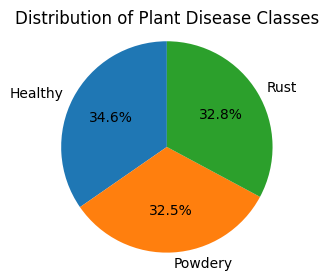

In [7]:
import os
import matplotlib.pyplot as plt

dataset_dir = '/content/drive/MyDrive/Datasets/plant_disease'

# Directory names for each class
class_dirs = ['Healthy', 'Powdery', 'Rust']

# Count the number of images in each class directory
counts = []
for class_dir in class_dirs:
    class_path = os.path.join(dataset_dir, class_dir)
    counts.append(len(os.listdir(class_path)))

# Plotting the pie chart
plt.figure(figsize=(3,3))
plt.pie(counts, labels=class_dirs, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Plant Disease Classes')
plt.axis('equal')
plt.show()

In [8]:
# Load and preprocess dataset
img_size = (128, 128)
X, y = load_dataset(base_dir, img_size)

In [9]:
# Split dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

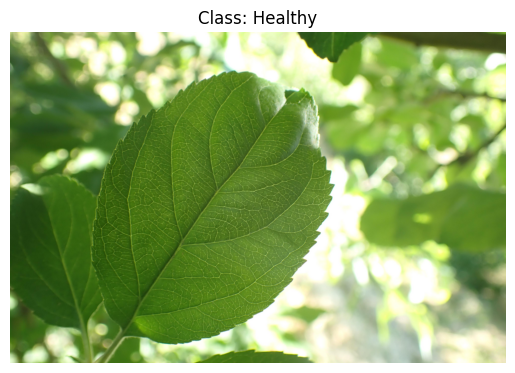

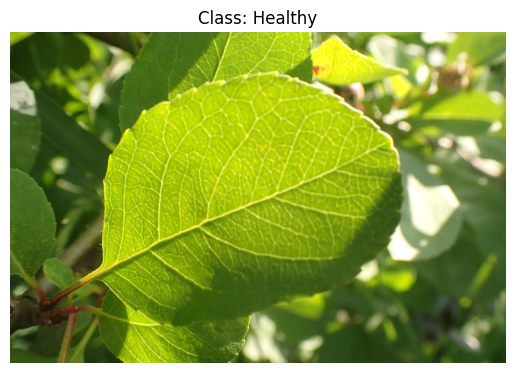

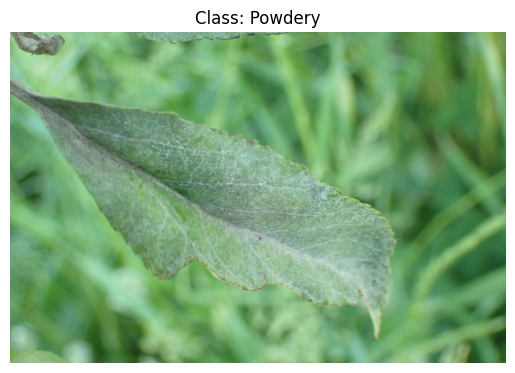

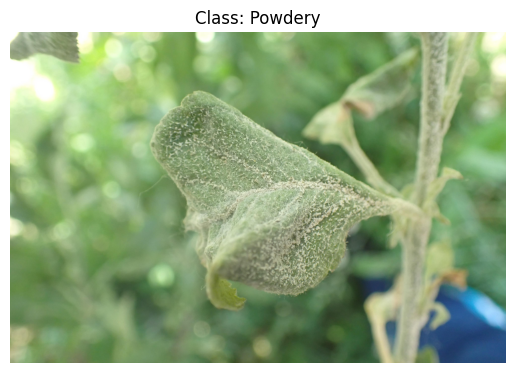

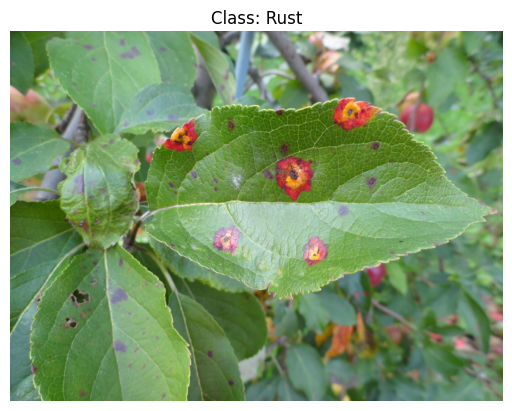

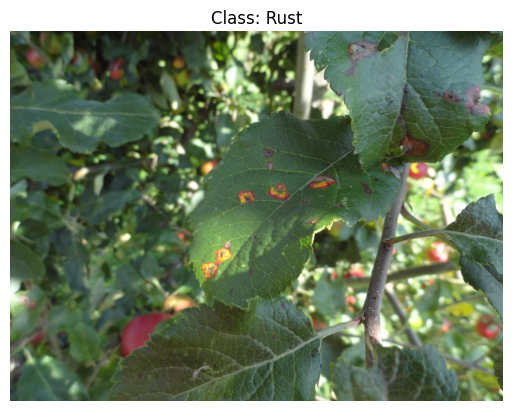

Skipping non-directory item: /content/drive/MyDrive/Datasets/plant_disease/plant_disease_model.h5
Skipping non-directory item: /content/drive/MyDrive/Datasets/plant_disease/healthy.jpeg
Skipping non-directory item: /content/drive/MyDrive/Datasets/plant_disease/powdery.jpg
Skipping non-directory item: /content/drive/MyDrive/Datasets/plant_disease/rust.jpeg


In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dataset_dir = '/content/drive/MyDrive/Datasets/plant_disease'

# Number of images to display from each class
num_images_per_class = 2

# Iterate through each class directory
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)

    # Check if the path is a directory
    if os.path.isdir(class_path):
        # Get list of images in the class directory
        images = os.listdir(class_path)

        # Randomly select num_images_per_class images
        selected_images = random.sample(images, num_images_per_class)

        # Display each selected image
        for image in selected_images:
            image_path = os.path.join(class_path, image)

            # Load and display the image using matplotlib
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(f'Class: {class_dir}')
            plt.axis('off')
            plt.show()
    else:
        print(f"Skipping non-directory item: {class_path}")


In [11]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# Build CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
34/34 [==============================] - 80s 2s/step - loss: 1.4441 - accuracy: 0.4551 - val_loss: 0.7630 - val_accuracy: 0.6075
Epoch 2/10
34/34 [==============================] - 77s 2s/step - loss: 0.5623 - accuracy: 0.7578 - val_loss: 0.4280 - val_accuracy: 0.8302
Epoch 3/10
34/34 [==============================] - 79s 2s/step - loss: 0.3573 - accuracy: 0.8685 - val_loss: 0.3521 - val_accuracy: 0.8604
Epoch 4/10
34/34 [==============================] - 88s 3s/step - loss: 0.2723 - accuracy: 0.9063 - val_loss: 0.3850 - val_accuracy: 0.8566
Epoch 5/10
34/34 [==============================] - 78s 2s/step - loss: 0.2296 - accuracy: 0.9177 - val_loss: 0.3041 - val_accuracy: 0.9132
Epoch 6/10
34/34 [==============================] - 81s 2s/step - loss: 0.1306 - accuracy: 0.9574 - val_loss: 0.2712 - val_accuracy: 0.9132
Epoch 7/10
34/34 [==============================] - 81s 2s/step - loss: 0.1114 - accuracy: 0.9603 - val_loss: 0.3849 - val_accuracy: 0.8868
Epoch 8/10
34/34 [==

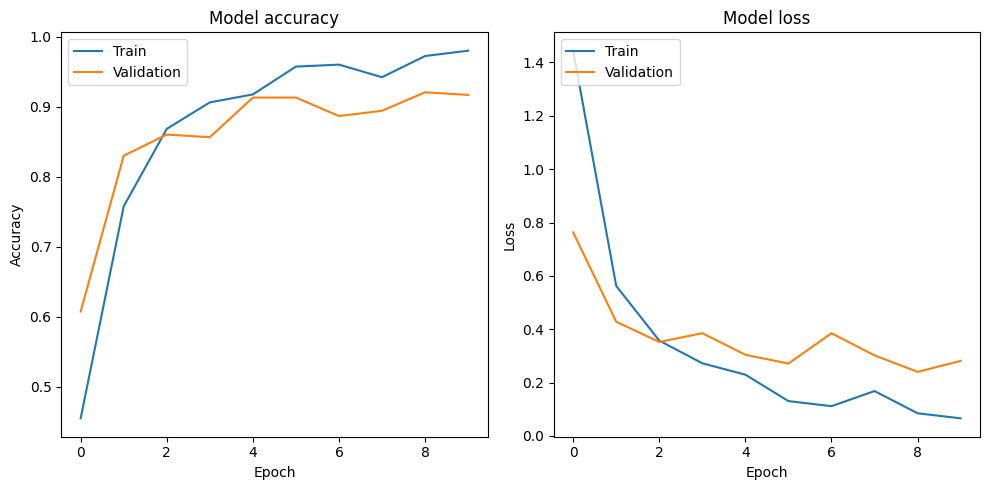

In [16]:
# Plotting accuracy and loss vs epochs
plt.figure(figsize=(10,5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
# Save the model
model.save('/content/drive/MyDrive/Datasets/Train/plant_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Load the saved model
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Datasets/Train/plant_disease_model.h5")

**Testing the model**

In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img, img_array

1/1 [==============================] - 0s 352ms/step
Predicted class name: Healthy


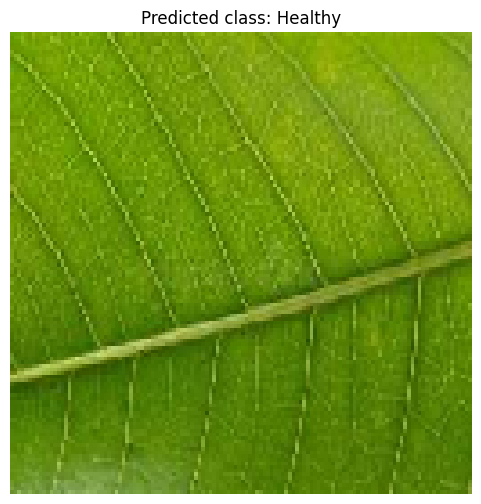

In [21]:
# Example image path to make prediction
image_path = '/content/drive/MyDrive/Datasets/plant_disease/healthy.jpeg'
target_size = (128, 128)

# Preprocess the image
img, img_preprocessed = preprocess_image(image_path, target_size)

# Make predictions
predictions = model.predict(img_preprocessed)

# Assuming predictions shape is (1, num_classes), extract the predicted class
predicted_class_index = np.argmax(predictions[0])

class_names = ['Healthy', 'Powdery', 'Rust']
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print(f'Predicted class name: {predicted_class_name}')

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)  # Display the image directly
plt.title(f'Predicted class: {predicted_class_name}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 50ms/step
Predicted class name: Powdery


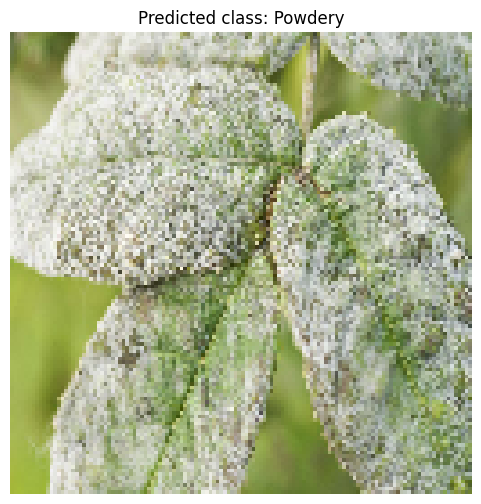

In [22]:
# Example image path to make prediction
image_path = '/content/drive/MyDrive/Datasets/plant_disease/powdery.jpg'
target_size = (128, 128)

# Preprocess the image
img, img_preprocessed = preprocess_image(image_path, target_size)

# Make predictions
predictions = model.predict(img_preprocessed)

# Assuming predictions shape is (1, num_classes), extract the predicted class
predicted_class_index = np.argmax(predictions[0])

class_names = ['Healthy', 'Powdery', 'Rust']
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print(f'Predicted class name: {predicted_class_name}')

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)  # Display the image directly
plt.title(f'Predicted class: {predicted_class_name}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 55ms/step
Predicted class name: Rust


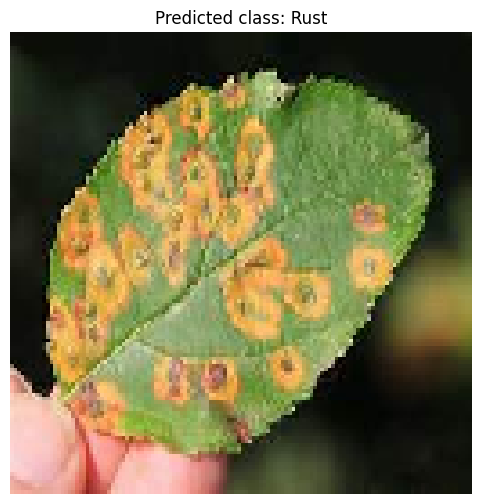

In [23]:
# Example image path to make prediction
image_path = '/content/drive/MyDrive/Datasets/plant_disease/rust.jpeg'
target_size = (128, 128)

# Preprocess the image
img, img_preprocessed = preprocess_image(image_path, target_size)

# Make predictions
predictions = model.predict(img_preprocessed)

# Assuming predictions shape is (1, num_classes), extract the predicted class
predicted_class_index = np.argmax(predictions[0])

class_names = ['Healthy', 'Powdery', 'Rust']
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print(f'Predicted class name: {predicted_class_name}')

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)  # Display the image directly
plt.title(f'Predicted class: {predicted_class_name}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 118ms/step


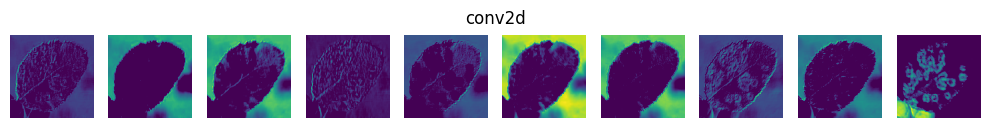

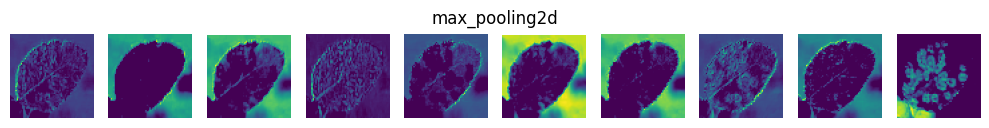

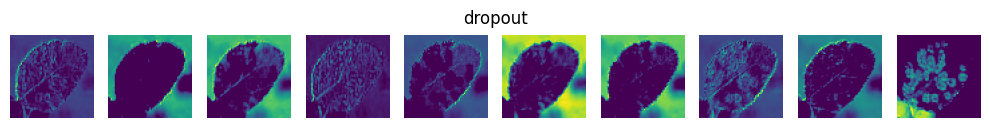

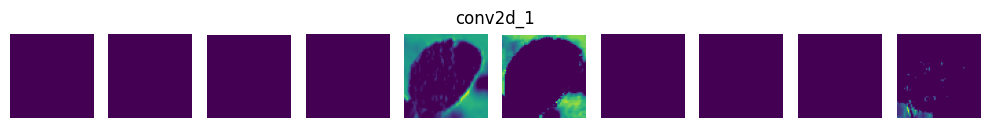

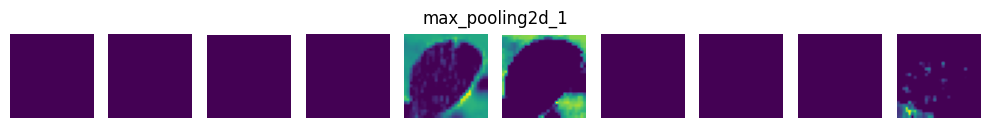

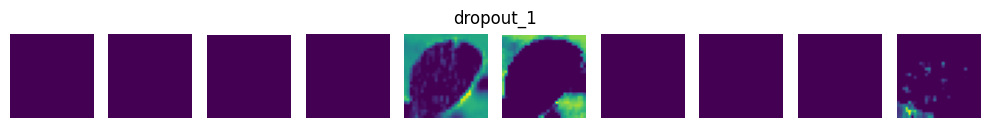

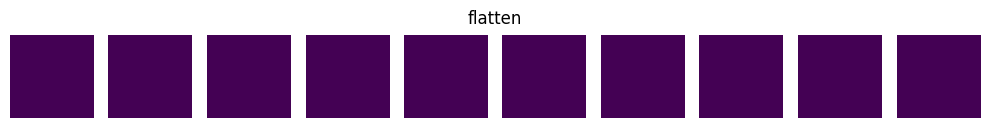

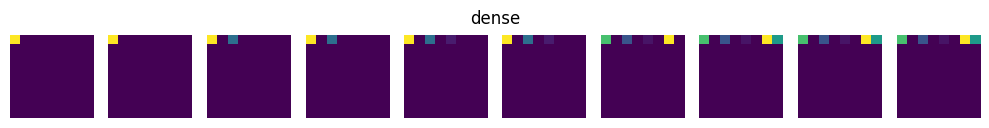

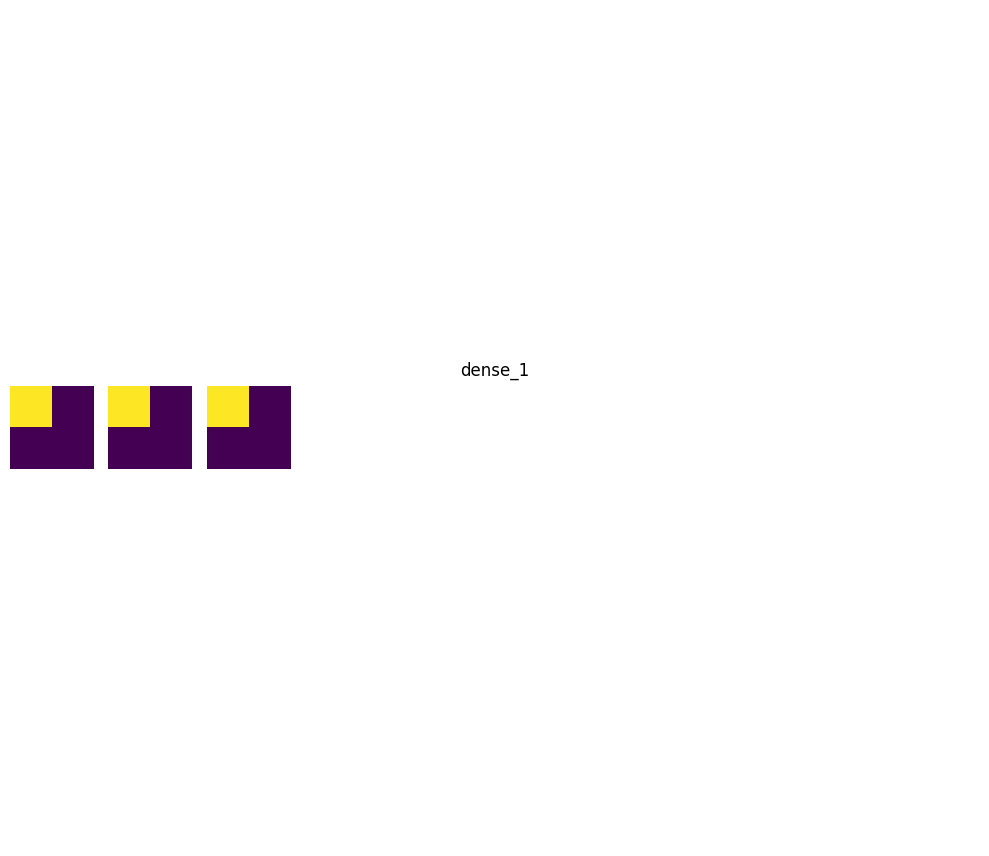

In [25]:
#feature maps layer wise

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/plant_disease/plant_disease_model.h5')

# Preprocess the image
image_path = '/content/drive/MyDrive/Datasets/plant_disease/rust.jpeg'
image = load_img(image_path, target_size=(128, 128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Get the names of the layers to visualize
layer_names = [layer.name for layer in model.layers]

# Create a model that will output the feature maps for each layer
outputs = [model.get_layer(name).output for name in layer_names]
visualization_model = Model(inputs=model.input, outputs=outputs)

# Get the feature maps for the test image
feature_maps = visualization_model.predict(image)

# Plot the feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:  # Convolutional or pooling layer
        num_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        cols = 10
        rows = num_features // cols + 1

        plt.figure(figsize=(10,10))
        plt.suptitle(layer_name, y=0.5)

        for i in range(min(num_features, 10)):
            plt.subplot(1, 10, i + 1)
            plt.imshow(feature_map[0, :, :, i], cmap='viridis')
            plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()

    elif len(feature_map.shape) == 2:  # Dense or flatten layer
        num_features = feature_map.shape[-1]
        size = int(np.ceil(np.sqrt(num_features)))
        reshaped_feature_map = np.zeros((size, size))

        plt.figure(figsize=(10,10))
        plt.suptitle(layer_name, y=0.5)

        for i in range(10):
            plt.subplot(1, 10, i + 1)
            if i < num_features:
                reshaped_feature_map.flat[i] = feature_map[0, i]
                plt.imshow(reshaped_feature_map, cmap='viridis')
            plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()